<a href="https://colab.research.google.com/github/shayanAbbasi1995/Non-financial-misconduct-and-Market-reaction/blob/main/Master_project_CAR_overlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA and LIBs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Run this if running in Google Collab
# Mount google drive if running from Google Collab
from google.colab import drive
drive.mount('/content/drive')

# Set current directory if running from Google Collab

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/SP500')# here use your path to current notebook

Mounted at /content/drive


In [ ]:
import pandas as pd
# SP500 data
returns = pd.read_excel('./ALL returns.xlsx') # DAtaset was for 2016-2020
lost_return = pd.read_excel('./lost returns.xlsx')
#returns = pd.read_csv('./ALL Return2007-2020.csv')
#returns = pd.read_excel('RET 2009-2020.xlsx')
SPY = pd.read_csv('./INDEXES.csv')
#SPY = pd.read_excel('index 2009-2020.xlsx')

In [ ]:
SPY

,DATE,vwretd,vwretx,ewretd,ewretx,sprtrn,spindx,totval,totcnt,usdval,usdcnt
0,20160104,-0.014893,-0.015055,-0.012338,-0.012423,-0.015304,2012.66,27249876900,7200,27672981100,7199
1,20160105,0.001387,0.001384,0.000358,0.000334,0.002012,2016.71,27289653500,7199,27241303800,7197
2,20160106,-0.013823,-0.014091,-0.013466,-0.013516,-0.013115,1990.26,26905200800,7198,27289640600,7198
3,20160107,-0.023943,-0.023967,-0.024829,-0.024847,-0.023700,1943.09,26259997300,7196,26905110200,7195
4,20160108,-0.010955,-0.010960,-0.010283,-0.010305,-0.010838,1922.03,25969468700,7194,26257073100,7194
...,...,...,...,...,...,...,...,...,...,...,...
1254,20201224,0.002332,0.002197,-0.000277,-0.000458,0.003537,3703.06,49387699400,7515,49278049200,7515
1255,20201228,0.003870,0.003859,0.001350,0.001304,0.008723,3735.36,49579392700,7516,49387699400,7514
1256,20201229,-0.003649,-0.003657,-0.008483,-0.008656,-0.002227,3727.04,49396998600,7522,49576731700,7514
1257,20201230,0.003281,0.003114,0.010155,0.009754,0.001342,3732.04,49551319700,7521,49396695300,7519


In [ ]:
lost_return

,PERMNO,Names Date,Ticker Symbol,Price or Bid/Ask Average,Returns
0,17778,2016-01-04,BRK,196295.000000,-0.007609
1,17778,2016-01-05,BRK,197000.000000,0.003592
2,17778,2016-01-06,BRK,197415.000000,0.002107
3,17778,2016-01-07,BRK,195580.000000,-0.009295
4,17778,2016-01-08,BRK,193900.000000,-0.008590
...,...,...,...,...,...
14244,90199,2020-12-24,CBRE,62.930000,0.002869
14245,90199,2020-12-28,CBRE,62.970001,0.000636
14246,90199,2020-12-29,CBRE,62.110001,-0.013657
14247,90199,2020-12-30,CBRE,62.400002,0.004669


In [ ]:
lost_return.columns = ['','date','TICKER','PRC', 'RET'] 

In [ ]:
returns.isna().sum()

date       1
TICKER     1
PRC       10
RET       10
dtype: int64

In [ ]:
returns 

,date,TICKER,PRC,RET
0,NaT,NaN,NaN,NaN
1,2016-01-04,MSFT,54.80000,-0.012257
2,2016-01-05,MSFT,55.05000,0.004562
3,2016-01-06,MSFT,54.05000,-0.018165
4,2016-01-07,MSFT,52.17000,-0.034783
...,...,...,...,...
423555,2020-12-24,DG,211.28000,0.000521
423556,2020-12-28,DG,210.39000,-0.004212
423557,2020-12-29,DG,211.34000,0.004515
423558,2020-12-30,DG,209.92999,-0.006672


In [ ]:
lost_return = lost_return[['date','TICKER','PRC', 'RET']] 
returns = pd.concat([returns,lost_return], ignore_index=True)
returns

,date,TICKER,PRC,RET
0,NaT,NaN,NaN,NaN
1,2016-01-04,MSFT,54.800000,-0.012257
2,2016-01-05,MSFT,55.050000,0.004562
3,2016-01-06,MSFT,54.050000,-0.018165
4,2016-01-07,MSFT,52.170000,-0.034783
...,...,...,...,...
437804,2020-12-24,CBRE,62.930000,0.00286853
437805,2020-12-28,CBRE,62.970001,0.000635641
437806,2020-12-29,CBRE,62.110001,-0.0136573
437807,2020-12-30,CBRE,62.400002,0.00466915


In [ ]:
index_df = SPY[['DATE', 'vwretx']]
index_df.columns = ['date', 'SPY']
index_df

,date,SPY
0,20160104,-0.015055
1,20160105,0.001384
2,20160106,-0.014091
3,20160107,-0.023967
4,20160108,-0.010960
...,...,...
1254,20201224,0.002197
1255,20201228,0.003859
1256,20201229,-0.003657
1257,20201230,0.003114


In [ ]:
df = pd.DataFrame()
j = 0
for i in returns.groupby('TICKER'):
  j += 1
  if(j==3):
    df['date'] = pd.DataFrame(i[1])['date']
    break
df = pd.DataFrame(df.reset_index()['date'])

for i in returns.groupby('TICKER'):
  temp_df = pd.DataFrame(i[1])[['date', 'RET']]
  temp_df.columns = ['date', i[0]]
  temp_df = temp_df.reset_index()[['date', i[0]]]
  df[i[0]] = temp_df[i[0]]
df['SPY'] = np.nan
i = len(index_df['SPY'])
df['SPY'][-i::] = index_df['SPY'][-i::]

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,AA,AAL,AAP,ABBV,ABC,ABT,ADM,ADP,AEE,AEP,AFL,AIG,AIZ,AJG,ALB,ALK,ALL,ALXN,AME,AMGN,AMP,AMZN,ANTM,AOS,APA,APD,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,AZO,BA,BAC,BAX,BBT,...,UA,UAA,UAL,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,UTX,V,VLO,VMC,VZ,WAB,WABC,WBA,WDC,WEC,WFC,WHR,WM,WMB,WMIH,WMT,WR,WRK,WU,WY,WYNN,XEC,XEL,XOM,XYL,YUM,ZBH,ZION,SPY
0,2016-01-04,-0.016211,-0.034002,0.011494,-0.027515,-0.017742,-0.044088,-0.022901,-0.03128,-0.004626,0.00103,-0.01202,-0.024851,-0.025081,-0.018075,-0.008213,-0.026208,-0.02287,-0.031822,-0.017541,-0.02458,-0.020391,-0.057554,-0.001649,-0.018666,-0.0009,-0.007071,-0.121634,-0.028158,-0.01852,-0.019773,-0.0233,0.00954,-0.028181,-0.002524,-0.008667,-0.028287,-0.023767,-0.025688,-0.03068,...,C,0.042986,-0.029494,-0.013139,-0.017243,-0.010031,-0.016221,0.009847,-0.014445,-0.024538,-0.027888,-0.005205,-0.023856,-0.01089,-0.026851,-0.007573,-0.013498,-0.032086,-0.02472,0.005829,0.000195,-0.026674,0.008307,-0.017238,0.021012,-0.003861,0.00261,-0.000943,-0.002192,-0.016192,-0.005003,-0.00607,0.006937,-0.005848,-0.006286,-0.011507,-0.011499,-0.007603,-0.021612,-0.015055
1,2016-01-05,-0.045314,-0.009533,-0.006831,-0.004166,0.014626,-0.000233,0.011161,0.002437,0.011852,0.008229,-0.001352,0.003475,0.016684,0.002736,-0.015302,-0.016709,-0.002308,0.001191,-0.005128,-0.001074,-0.003933,-0.005024,0.014582,-0.005587,-0.020257,-0.017881,-0.051797,-0.012759,0.023019,-0.033455,0.00768,-0.002818,-0.015387,0.012692,0.004596,0.004057,0,0.004036,0.000273,...,-0.058155,0.020762,-0.00989,0.004325,0.00473,0.001889,-0.005191,-0.009624,0.009911,-0.010034,0.004822,0.00157,0.00753,0.017444,0.001407,0.013734,-0.017531,0.000663,-0.026249,-0.004305,0.010717,-0.000378,-0.021541,0.003813,0.00343,-0.034884,0.023755,0.006372,-0.000659,-0.003973,0.002347,0.018904,0.006444,0.010084,0.008521,-0.000277,-0.002493,0.020823,-0.010857,0.001384
2,2016-01-06,-0.071197,0.017522,-0.026455,0.000174,-0.015286,-0.008388,-0.024283,-0.012277,0.006431,0.003741,-0.015228,-0.014677,-0.013153,-0.01935,-0.043693,0.014399,-0.011234,-0.004489,-0.022719,-0.009167,-0.033995,-0.001799,-0.024427,-0.019797,-0.114863,-0.024354,-0.025084,-0.009424,-0.007464,-0.030759,-0.011675,-0.004323,-0.027648,-0.026379,-0.013074,-0.015879,-0.021303,0.002412,-0.013912,...,0.004583,0.001518,0.002543,-0.023052,0.002956,-0.010199,-0.027317,-0.043217,-0.014199,-0.047823,-0.015115,-0.027163,-0.013111,-0.007026,-0.023231,-0.008925,-0.034963,-0.009496,-0.015333,-0.022281,-0.002699,-0.019096,-0.025535,0.012346,-0.13027,-0.012048,0.010013,0.002345,-0.027698,-0.022792,-0.022074,-0.051805,-0.061161,0.010538,-0.008321,-0.012476,-0.00708,0.00433,-0.029145,-0.014091
3,2016-01-07,-0.039489,-0.018918,0.011073,-0.002963,-0.031932,-0.023966,-0.023756,-0.030519,0.000685,-0.01152,-0.01701,-0.023933,-0.022468,-0.020744,-0.045116,-0.053836,-0.023559,-0.052697,-0.023637,-0.023864,-0.031702,-0.039058,-0.017128,-0.048854,-0.051389,-0.033525,0.010863,-0.014134,-0.004578,-0.03181,-0.030025,-0.007514,-0.009003,-0.026529,0.00927,-0.041922,-0.03607,-0.016573,-0.028492,...,0.003601,-0.022128,-0.046558,-0.0242,-0.001255,-0.02944,-0.027769,-0.023386,-0.019276,-0.065067,-0.019001,-0.013101,-0.019662,0.020238,-0.02323,-0.005492,-0.033373,-0.00981,0.019339,-0.016497,-0.000193,-0.028527,-0.025142,-0.01182,-0.1,-0.00813,0.023289,-0.011699,-0.009948,-0.005831,-0.036936,-0.09407,-0.037394,0.003842,-0.016006,-0.025828,-0.034116,-0.022993,-0.03002,-0.023967
4,2016-01-08,-0.024184,-0.001978,-0.021971,-0.027268,-0.005785,-0.020944,-0.003766,-0.008251,-0.007754,-0.001542,-0.00874,-0.014918,-0.012206,-0.010592,-0.018819,-0.04879,-0.003593,-0.035786,-0.018207,-0.014871,-0.022547,-0.001464,-0.024367,-0.035581,0.002736,-0.005182,-0.019231,-0.01544,-0.017738,-0.006587,0.009641,0.003869,-0.003289,-0.037348,-0.032475,-0.022705,-0.019355,-0.016037,-0.02164,...,0.010287,0.00031,-0.01406,-0.004606,-0.004427,-0.017218,-0.012658,0.010673,-0.013067,-0.00882,-0.014154,-0.016322,-0.012332,-0.053128,-0.023216,-0.009719,-0.017729,-0.021392,-0.001

In [ ]:
df.LHX.isna().sum()

497

In [ ]:
len(df.columns)

352

In [ ]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#for i in range(len(df.date)):
#  df.date.iloc[i] = pd.Timestamp(df.date.iloc[i])

#type(df.date[0])

In [ ]:
#df.to_csv('returns.csv', index=False) 

In [ ]:
df.AAL.isnull().value_counts()

False    1259
Name: AAL, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
SAMPLE_TYPE = 'ALL' #OWEN
if SAMPLE_TYPE == 'OWEN':
  events = pd.read_csv('./event sample.csv')
  events.columns = ['ticker', 'market', 'date']
  events["date"] = pd.to_datetime(events["date"]).dt.date
  mask = events.ticker == 'BRK.B'
  events.loc[mask, 'ticker'] = 'BRK'
  events
if SAMPLE_TYPE == 'ALL':
  events = pd.read_excel('./Sample_All.xlsx')
  All_sample = events.copy()
  events = events[['stock_ticker','date', 'industry',  'major_industry', 'govt_level', 'primary_offense', 'secondary_offense', 'offense_group', 'civil_criminal', 'penalty', 'agency_code1']]
  events.columns = ['ticker','date', 'industry',  'major_industry', 'govt_level', 'primary_offense', 'secondary_offense', 'offense_group', 'civil_criminal', 'penalty', 'agency_code1']
  mask = events.ticker == 'BRK.B'
  events.loc[mask, 'ticker'] = 'BRK'

In [ ]:
events.columns

Index(['ticker', 'date', 'industry', 'major_industry', 'govt_level',
       'primary_offense', 'secondary_offense', 'offense_group',
       'civil_criminal', 'penalty', 'agency_code1'],
      dtype='object')

In [ ]:
events.agency_code1.value_counts()

OSHA             1440
FMCSA            1072
FRA              1037
WHD               605
EPA               271
INS               227
CMS               222
AG                214
MSHA              204
MHC               123
FAA               121
NLRB              110
EEOC               74
OFCCP              57
USAO               53
FIN                35
EBSA               30
DBO                27
FCC                23
DFS                23
BSEE               22
MULTI              21
DOJ_CIVIL          20
SEC                14
FTC                14
PHMSA              11
ACPD               11
DLI                 9
CFPB                9
HHSOIG              9
FERC                7
BIS                 6
CFTC                6
DOJ_CRIMINAL        6
HHSOCR              5
DOJ_RIGHTS          4
HUD                 4
DEA                 4
OFR                 3
ED                  3
DOJ_ANTITRUST       3
NRC                 2
DBI                 2
BKG                 2
AMS                 2
DDTC      

In [ ]:
ticker_lst = events.ticker.value_counts().head(45).index
ticker_lst

Index(['BRK', 'KMI', 'UNP', 'DLTR', 'BAC', 'CSX', 'WFC', 'JNJ', 'WMT', 'GE',
       'JPM', 'VZ', 'MMM', 'NSC', 'PSX', 'CI', 'HD', 'DG', 'KR', 'XOM', 'UPS',
       'AMZN', 'FCX', 'IP', 'AAL', 'ANTM', 'CVS', 'UNH', 'D', 'C', 'ABT',
       'DAL', 'TSN', 'CMCSA', 'MLM', 'GM', 'FDX', 'PGR', 'NUE', 'MPC', 'LHX',
       'WBA', 'TGT', 'COP', 'PFE'],
      dtype='object')

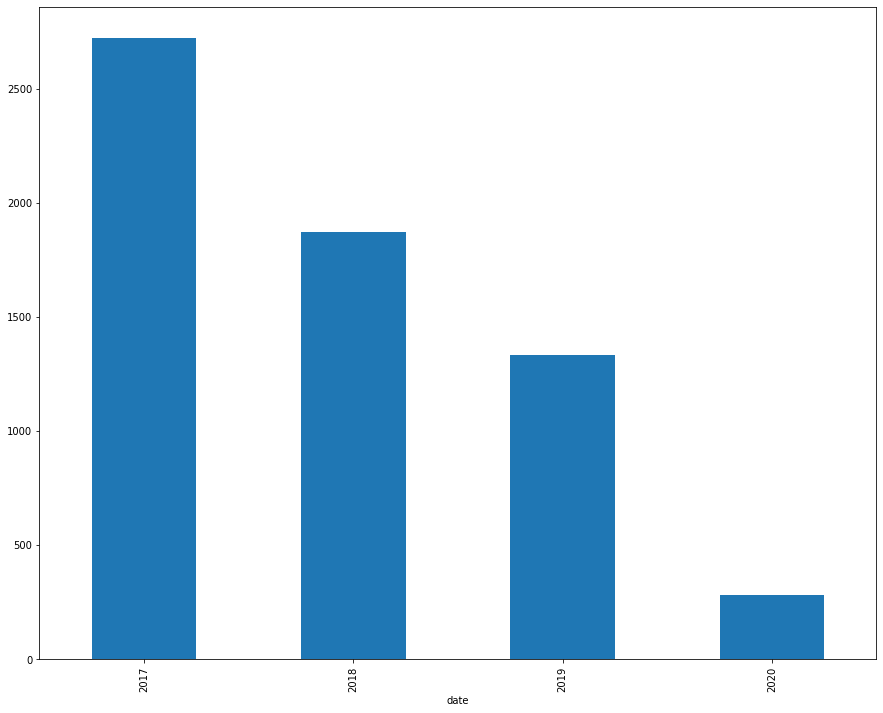

In [ ]:
plt.figure(figsize=(15,12))
events.date.groupby(events.date.dt.year).count().plot(kind="bar")

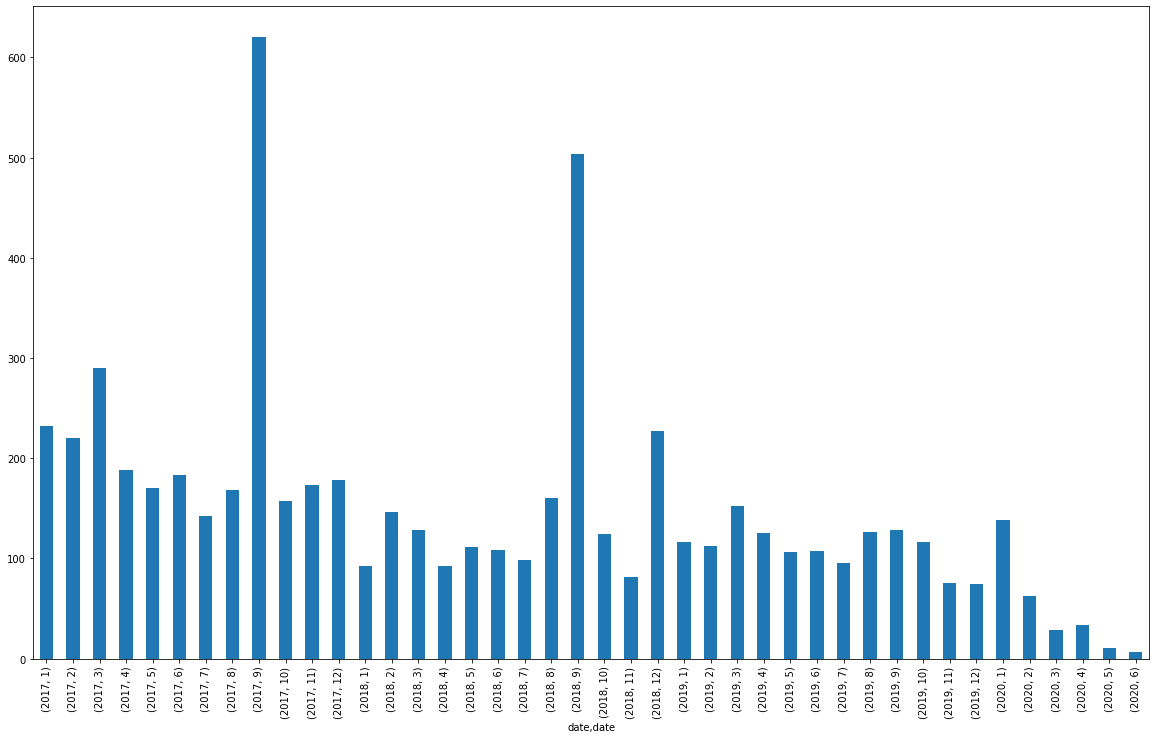

In [ ]:
plt.figure(figsize=(20,12))
events.date.groupby([events.date.dt.year, events.date.dt.month]).count().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


29.566666666666666


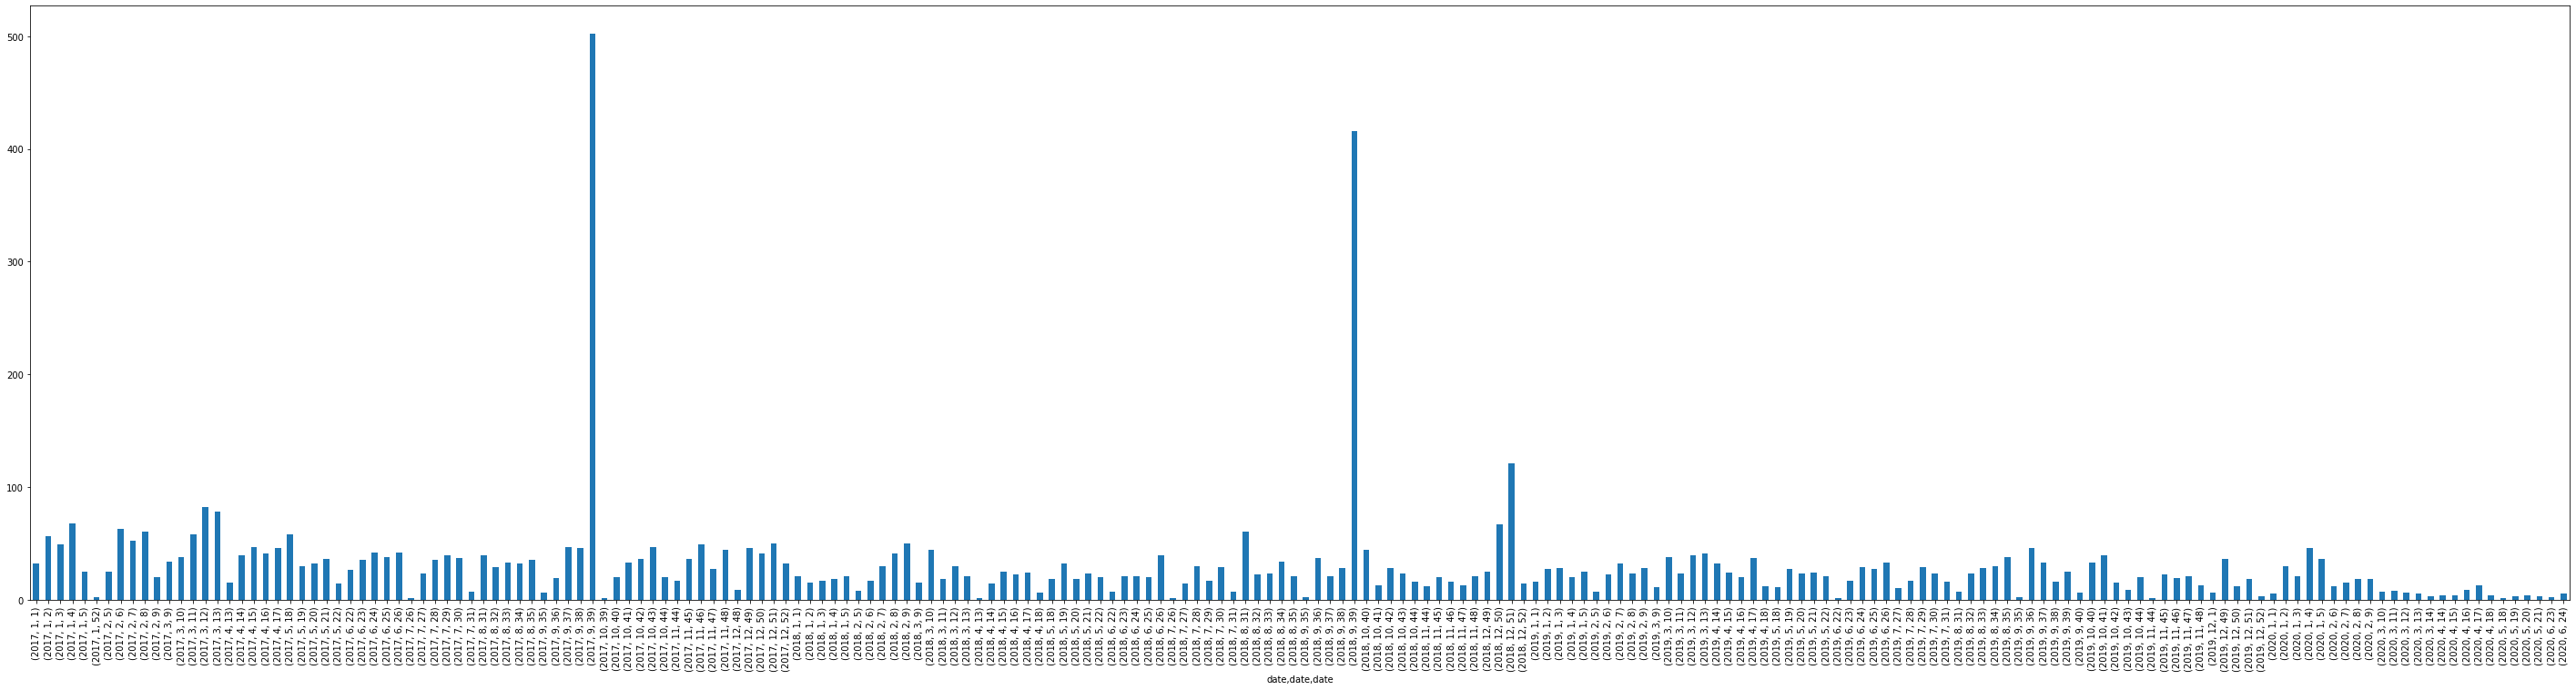

In [ ]:
plt.figure(figsize=(50,12))
events.date.groupby([events.date.dt.year, events.date.dt.month, events.date.dt.week]).count().plot(kind="bar")
print(events.date.groupby([events.date.dt.year, events.date.dt.month, events.date.dt.week]).count().mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


6.522058823529412


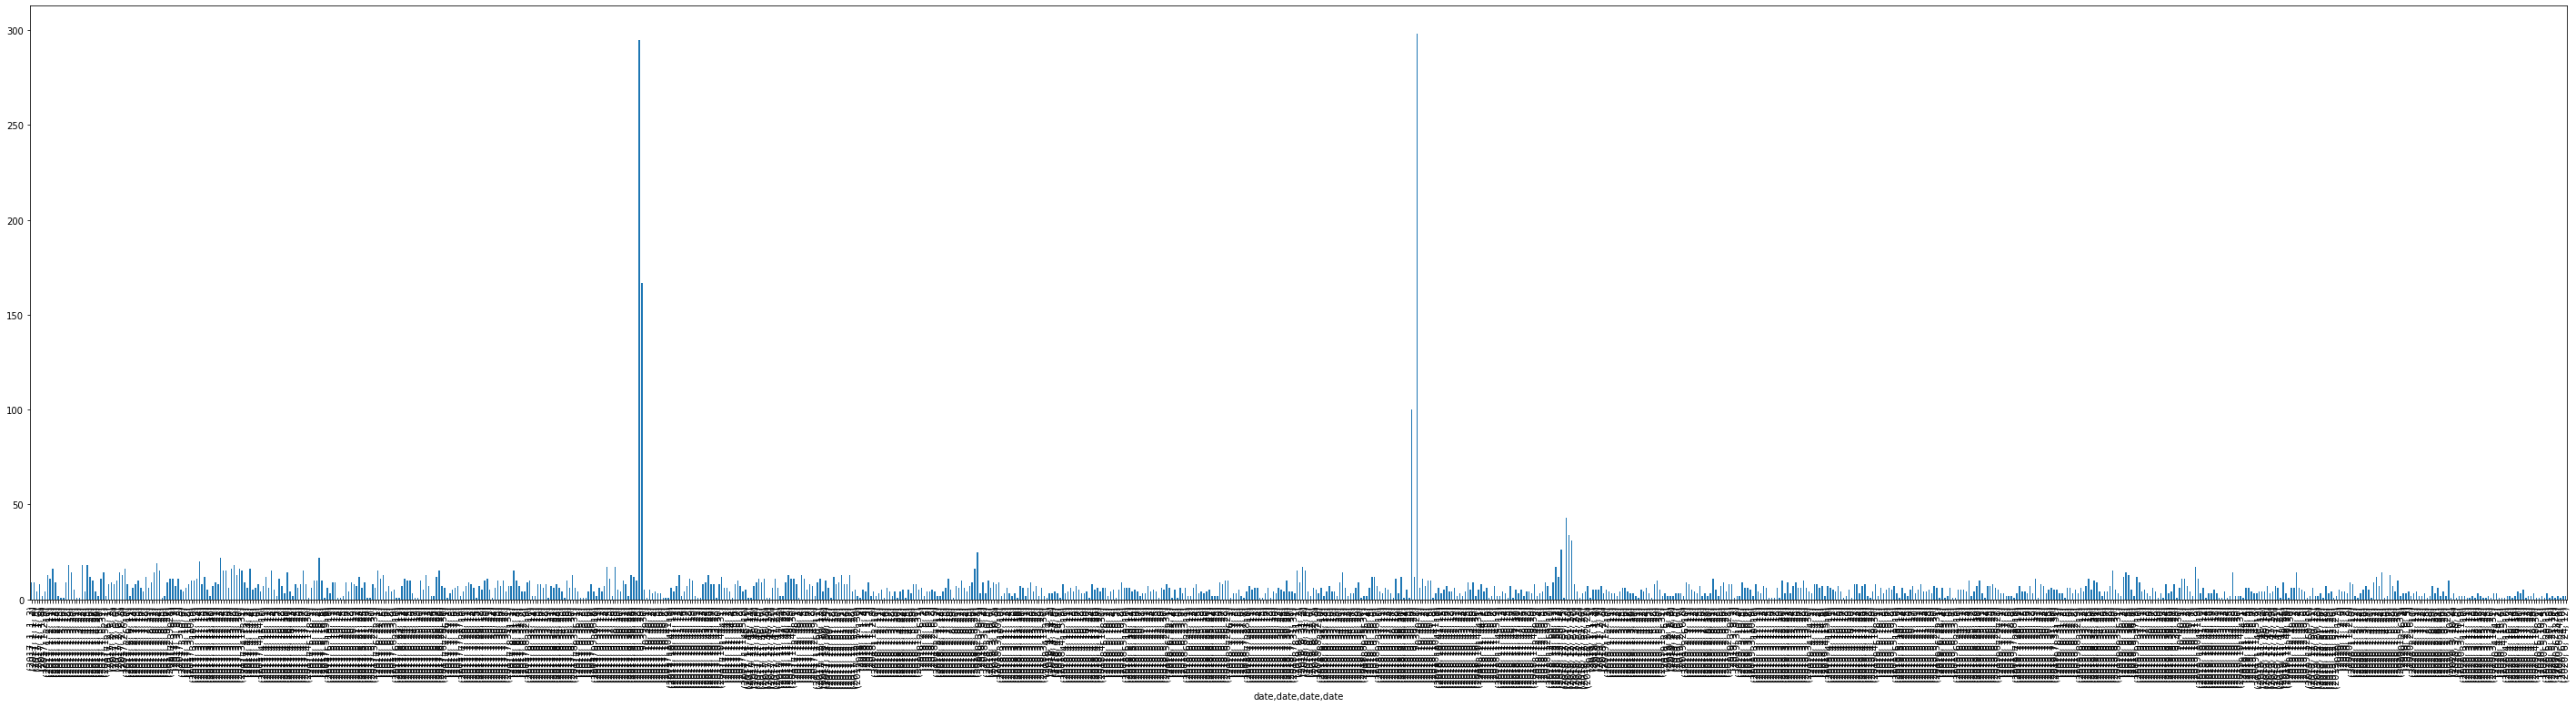

In [ ]:
plt.figure(figsize=(50,12))
events.date.groupby([events.date.dt.year, events.date.dt.month, events.date.dt.week, events.date.dt.day]).count().plot(kind="bar")
print(events.date.groupby([events.date.dt.year, events.date.dt.month, events.date.dt.week, events.date.dt.day]).count().mean())

#CAR Overlap

#Main Functions

In [ ]:
import statsmodels.api as sm
import re

def get_estwin_returns(df, ev_date, ticker, es_win_len, lower_ev_win, gap=0): 
  '''
  ev_date is in '20170105' format.
  ticker is string not obj.
  lower_ev_win is already a negative value pointing to the negative lower bound of event window
  '''
  post_ev_df = df[['date', ticker]][df.date < pd.Timestamp(ev_date)]
  if gap != 0:
    es_win_df = post_ev_df[['date', ticker]].iloc[-es_win_len+lower_ev_win-gap:-gap+lower_ev_win:]
  if gap ==0:
    es_win_df = post_ev_df[['date', ticker]].iloc[-es_win_len+lower_ev_win:lower_ev_win:]
  '''
  the result will be a column of date and a column of ticker returns
  '''
  return es_win_df #returns df of date and return for the specific return

def est_ols_params(X,Y):
  #add column of 1 to X for constant coefficient
  X = sm.add_constant(X)
  model = sm.OLS(Y, X)
  result = model.fit()
  #OLS model
  alpha = result.params[0]
  beta = result.params[1]
  return alpha, beta

def find_bound_dates(df, ev_date, ticker, ev_win_upper, ev_win_lower):
  up_bound = timestamp_convert(str(df.date[df.index[df.date == ev_date][0]+ev_win_upper+1])).split(' ')[0]
  low_bound = timestamp_convert(str(df.date[df.index[df.date == ev_date][0]+ev_win_lower-1])).split(' ')[0] #ev_win_lower is already a negative value
  post_upper_ev_df = df[['date', ticker]].query(f'date < {up_bound}')
  ev_win_df = post_upper_ev_df.query(f'date > {low_bound}')
  return ev_win_df

def get_evwin_returns(df, ev_date, ticker, ev_win_upper, ev_win_lower):
  '''
  ev_win_upper, ev_win_lower are in '20170105' format.
  ticker is string not obj like 'AA'.
  '''
  if pd.Timestamp(ev_date) in df['date'].values:
    ev_win_df = find_bound_dates(df, ev_date, ticker, ev_win_upper, ev_win_lower)
  else:
    temp_ev_date = timestamp_convert(str(pd.Timestamp(ev_date)+pd.to_timedelta(1,'d')).split(' ')[0])
    while pd.Timestamp(temp_ev_date) not in df['date'].values:
      temp_ev_date = str(pd.Timestamp(temp_ev_date)+pd.to_timedelta(1,'d')).split(' ')[0]
    ev_win_df = find_bound_dates(df, temp_ev_date, ticker, ev_win_upper, ev_win_lower)
  return ev_win_df

def timestamp_convert(date):
  date = re.sub('-', '', date)
  return date

def check_win_NaN(series):
  if series.isnull().sum()>0:
    print(f'For ticker {series.name} we have {series.isnull().sum()} NaN values \
    in the window')
    return 0 #False
  else:
    return 1 #True

def cal_AR(R, Rm, alpha, beta, model='market_model'):
  if model == 'market_model':
    ER = alpha + beta*Rm
  return np.array(R - ER)

def cal_car(AR):
  ev_car = AR.cumsum()
  print(f'AR.shape[1] is {AR.shape[1]}')
  ev_car["CAAR"] = (1/AR.shape[1])*(ev_car.sum(axis=1)) #Adds CAAR to CAR matrix
  return ev_car

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def AR_ev_es_vec(returns, events, es_win, ev_win, minNA=100, gap_=0):
  '''
  es_win is int like 252 and ev_win is list like [-5,10]
  '''
  AR = pd.DataFrame()
  AR['date'] = df[df.date > '2016-01-01'].date
  for ticker, ev_date in zip(events.ticker, events.date):
    ev_date = str(ev_date)
    X = np.array(get_estwin_returns(returns, timestamp_convert(ev_date), ticker, es_win,ev_win[0], gap=gap_)[ticker], dtype=float)
    Y = np.array(get_estwin_returns(returns, timestamp_convert(ev_date), 'SPY', es_win,ev_win[0], gap=gap_)['SPY'], dtype=float)
    try:
      AR_temp = pd.DataFrame()
      if check_win_NaN(pd.Series(X)) and check_win_NaN(pd.Series(Y)):
        alpha, beta = est_ols_params(X,Y)
        ev_X = get_evwin_returns(returns, ev_date, ticker, ev_win[1], ev_win[0])[ticker]
        AR_temp['date'] = get_evwin_returns(returns, ev_date, ticker, ev_win[1], ev_win[0])['date']
        ev_Y = get_evwin_returns(returns, ev_date, 'SPY', ev_win[1], ev_win[0])['SPY']
        if ticker not in AR.columns:
          AR_temp[ticker] = cal_AR(ev_X, ev_Y, alpha, beta)
          AR = AR.merge(AR_temp, on='date', how='left')
        else:
          if f'{ticker}_{ev_date[0:10]}' not in AR.columns:
            AR_temp[f'{ticker}_{ev_date[0:10]}'] = cal_AR(ev_X, ev_Y, alpha, beta)
            AR = AR.merge(AR_temp, on='date', how='left')
          else:
            for m in range(2,100):
              if f'{ticker}_{ev_date[0:10]}_{m}' not in AR.columns:
                #print(f'{ticker}_{ev_date[0:10]}_{m}')
                AR_temp[f'{ticker}_{ev_date[0:10]}_{m}'] = cal_AR(ev_X, ev_Y, alpha, beta)
                AR = AR.merge(AR_temp, on='date', how='left')
                break
      else:
        if pd.Series(X).isnull().sum() > minNA and pd.Series(Y).isnull().sum() > minNA:
          X = np.array(pd.Series(X)[pd.Series(X).notna()])
          Y = np.array(pd.Series(Y)[pd.Series(X).notna()])
          alpha, beta = est_ols_params(X,Y)
          ev_X = get_evwin_returns(returns, ev_date, ticker, ev_win[1], ev_win[0])[ticker]
          AR_temp['date'] = get_evwin_returns(returns, ev_date, ticker, ev_win[1], ev_win[0])['date']
          ev_Y = get_evwin_returns(returns, ev_date, 'SPY', ev_win[1], ev_win[0])['SPY']
          if ticker not in AR.columns:
            AR_temp[ticker] = cal_AR(ev_X, ev_Y, alpha, beta)
            AR = AR.merge(AR_temp, on='date', how='left')
          else:
            if f'{ticker}_{ev_date[0:10]}' not in AR.columns:
              AR_temp[f'{ticker}_{ev_date[0:10]}'] = cal_AR(ev_X, ev_Y, alpha, beta)
              AR = AR.merge(AR_temp, on='date', how='left')
            else:
              for mm in range(2,100):
                if f'{ticker}_{ev_date[0:10]}_{mm}' not in AR.columns:
                  #print(f'{ticker}_{ev_date[0:10]}_{m}')
                  AR_temp[f'{ticker}_{ev_date[0:10]}_{mm}'] = cal_AR(ev_X, ev_Y, alpha, beta)
                  AR = AR.merge(AR_temp, on='date', how='left')
                  break
     

    except:
      print(f'Something is wrong with {ticker} in {ev_date}')
      pass
  return AR

In [ ]:
def cal_CAAR(AR_overlap, events, es_win_len, lower_ev_win, gap=0):
  AR_len = []
  for i in range(AR_overlap.shape[0]):
    AR_len.append(len(AR_overlap.iloc[i,:][AR_overlap.iloc[i,:].notna()]))
  AR_t = pd.DataFrame()
  AR_t['AR_t'] = AR_overlap.iloc[:, 1::].sum(axis=1)
  AR_t['date'] = AR_overlap['date']
  CAR = []
  '''
  for ev_date in events.date:
    post_ev_df = AR_t[['date', 'AR_t']][AR_t.date < pd.Timestamp(ev_date)]
    es_win_df = post_ev_df[['date', 'AR_t']].iloc[-es_win_len+lower_ev_win-gap:-gap+lower_ev_win:]
    CAR.append(es_win_df.AR_t.sum())
  CAAR = (1/len(CAR))*sum(CAR)
  '''
  return AR_t.AR_t.sum()/AR_overlap.shape[1]

In [ ]:
def es_AR(returns, events, es_win, ev_win, minNA=100, gap_=0):
  '''
  es_win is int like 252 and ev_win is list like [-5,10]
  '''
  AR = pd.DataFrame()
  AR['date'] = df[df.date > '2016-01-01'].date
  for ticker, ev_date in zip(events.ticker, events.date):
    ev_date = str(ev_date)
    X = np.array(get_estwin_returns(returns, timestamp_convert(ev_date), ticker, es_win,ev_win[0], gap=gap_)[ticker], dtype=float)
    Y = np.array(get_estwin_returns(returns, timestamp_convert(ev_date), 'SPY', es_win,ev_win[0], gap=gap_)['SPY'], dtype=float)
    try:
      AR_temp = pd.DataFrame()
      if check_win_NaN(pd.Series(X)) and check_win_NaN(pd.Series(Y)):
        alpha, beta = est_ols_params(X,Y)
        AR_temp['date'] = get_estwin_returns(returns, timestamp_convert(ev_date), ticker, es_win,ev_win[0], gap=gap_)['date']
        if ticker not in AR.columns:
          AR_temp[ticker] = cal_AR(X, Y, alpha, beta)
          AR = AR.merge(AR_temp, on='date', how='left')
        else:
          if f'{ticker}_{ev_date[0:10]}' not in AR.columns:
            AR_temp[f'{ticker}_{ev_date[0:10]}'] = cal_AR(X, Y, alpha, beta)
            AR = AR.merge(AR_temp, on='date', how='left')
          else:
            for m in range(2,100):
              if f'{ticker}_{ev_date[0:10]}_{m}' not in AR.columns:
                #print(f'{ticker}_{ev_date[0:10]}_{m}')
                AR_temp[f'{ticker}_{ev_date[0:10]}_{m}'] = cal_AR(X, Y, alpha, beta)
                AR = AR.merge(AR_temp, on='date', how='left')
                break
      else:
        if pd.Series(X).isnull().sum() > minNA and pd.Series(Y).isnull().sum() > minNA:
          X = np.array(pd.Series(X)[pd.Series(X).notna()])
          Y = np.array(pd.Series(Y)[pd.Series(X).notna()])
          alpha, beta = est_ols_params(X,Y)
          AR_temp['date'] = get_estwin_returns(returns, timestamp_convert(ev_date), ticker, es_win,ev_win[0], gap=gap_)['date']
          if ticker not in AR.columns:
            AR_temp[ticker] = cal_AR(X, Y, alpha, beta)
            AR = AR.merge(AR_temp, on='date', how='left')
          else:
            if f'{ticker}_{ev_date[0:10]}' not in AR.columns:
              AR_temp[f'{ticker}_{ev_date[0:10]}'] = cal_AR(X, Y, alpha, beta)
              AR = AR.merge(AR_temp, on='date', how='left')
            else:
              for mm in range(2,100):
                if f'{ticker}_{ev_date[0:10]}_{mm}' not in AR.columns:
                  #print(f'{ticker}_{ev_date[0:10]}_{m}')
                  AR_temp[f'{ticker}_{ev_date[0:10]}_{mm}'] = cal_AR(X, Y, alpha, beta)
                  AR = AR.merge(AR_temp, on='date', how='left')
                  break
     

    except:
      print(f'Something is wrong with {ticker} in {ev_date}')
      pass
  return AR

In [ ]:
def cal_delta(AR, ev_win_len):
  main_lst = []
  for i in range(1, AR.shape[1]):
    temp_df = AR[AR.iloc[:,i].notna()]
    des_df = temp_df.drop(temp_df.columns[i],axis=1)
    temp_lst = []
    for i in range(1, des_df.shape[1]):
      temp_lst.append(des_df.iloc[:,i].notna().sum())
    main_lst.append(np.mean(temp_lst))
  delta = np.mean(main_lst)/ev_win_len
  return delta

In [ ]:
def cal_theta_varbar(es_AR):
  M = (es_AR.iloc[:,1::].notna().sum(axis=1)*(es_AR.iloc[:,1::].notna().sum(axis=1)-1)).sum()
  N = es_AR.iloc[:,1::].notna().sum(axis=1).sum()
  eps_t = es_AR.iloc[:,1::].sum(axis=1)
  eps_kt = es_AR.iloc[:,1::].pow(2).sum(axis=1)
  sig2_cr = eps_t.pow(2).sum()*(1/N)
  sig2_bar = eps_kt.sum()*(1/N)
  theta = ((sig2_cr/sig2_bar)-1)*N/M
  return theta, sig2_bar

In [ ]:
def sd_robust_CAAR(AR, es_AR, ev_win_len):
  delta = cal_delta(AR, ev_win_len)
  theta, sig2_bar = cal_theta_varbar(es_AR)
  n = AR.shape[1]
  var = ((1/n)*sig2_bar*(1+(delta*(n-1)*theta)))
  return np.sqrt(var) , n

In [ ]:
Major_industry_group = ['retailing', 'financial services', 'railroads', 'oil and gas',
      'healthcare services', 'pipelines', 'pharmaceuticals',
      'telecommunications', 'diversified', 'utilities and power generation',
      'miscellaneous manufacturing', 'airlines', 'food products',
      'aerospace and military contracting', 'freight and logistics',
      'paper and packaging', 'wholesalers', 'mining and minerals',
      'chemicals', 'construction and engineering', 'building materials',
      'waste management and environmental services', 'motor vehicles',
      'industrial equipment', 'metals', 'information technology',
      'housewares and home furnishings'] #Some categories have less than 30 events and we omitted them.
off_group = ['safety-related offenses', 'employment-related offenses',
        'consumer-protection-related offenses', 'environment-related offenses',
        'government-contracting-related offenses',
        'competition-related offenses', 'healthcare-related offenses'] #'miscellaneous offenses' has only 5 events so we omitted it, others have > 30

gov_level_group = ['federal', 'state', 'local'] #local had 25 events but we put it anyway.

primary_offence_group = ['workplace safety or health violation',
      'motor vehicle safety violation', 'wage and hour violation',
      'railroad safety violation', 'insurance violation',
      'environmental violation', 'nursing home violation',
      'employment discrimination', 'consumer protection violation',
      'aviation safety violation', 'labor relations violation',
      'False Claims Act and related', 'benefit plan administrator violation',
      'Family and Medical Leave Act']

secondary_offence_group = ['Fair Labor Standards Act', 'overtime violation', 'mining violation',
      'misclassification', 'other pay violation', 'meal/rest break violation',
      'off-the-clock work', 'Service Contract Act', 'racial discrimination',
      'child labor or youth employment violation',
      'Davis-Bacon Act and related', 'antiboycott violation']

agency_group = ['OSHA', 'FMCSA', 'FRA', 'WHD', 'EPA', 'CMS', 'INS', 'AG', 'MSHA', 'MHC',
      'FAA', 'NLRB', 'EEOC', 'OFCCP', 'USAO', 'FIN', 'EBSA']

penalty_group = ['[1000,6000]', '[20000, 31000]', '[44000,60000]', '[71000, 87000]']

In [ ]:
from scipy import stats
from scipy.stats import t

def output(returns, events, cat, cat_name, cat_members, es_win_, ev_win_):
  for i in cat_members:
    if cat_members[0] == '[1000,6000]':
      j = eval(i)
      mask1 = events[cat] > j[0] 
      mask2 = events[cat] < j[1]
      AR = AR_ev_es_vec(returns, events[mask1][mask2], es_win_, ev_win_, gap_=0)
      esAR = es_AR(returns, events[mask1][mask2], es_win_, ev_win_, minNA=100, gap_=0)
      sd, n = sd_robust_CAAR(AR, esAR, ev_win_[1]-ev_win_[0]+1)
      CAAR = cal_CAAR(AR, events[mask1][mask2], ev_win_[1]-ev_win_[0]+1, ev_win_[0]) #Last two arguments are useless now
      print(f'Statistics for event window = {ev_win_}, category = {cat_name}, subcategory = {i} for {n} Obs. :')
      print(f'sd ] {sd}, n={n}, CAAR = {CAAR}, t-stat = {CAAR/sd}, Pvalue = {stats.t.sf(np.abs(CAAR/sd), n-1)*2}')
    else:
      AR = AR_ev_es_vec(returns, events[events[cat] == i], es_win_, ev_win_, minNA=100, gap_=0)
      esAR = es_AR(returns, events[events[cat] == i], es_win_, ev_win_, minNA=100, gap_=0)
      sd, n = sd_robust_CAAR(AR, esAR, ev_win_[1]-ev_win_[0]+1)
      CAAR = cal_CAAR(AR, events[events[cat] == i], ev_win_[1]-ev_win_[0]+1, ev_win_[0]) #Last two arguments are useless now
      print(f'Statistics for event window = {ev_win_}, category = {cat_name}, subcategory = {i} for {n} Obs. :')
      print(f'sd = {sd}, n = {n}, CAAR = {CAAR}, t-stat = {CAAR/sd}, Pvalue = {stats.t.sf(np.abs(CAAR/sd), n-1)*2}')
    '''
    result = pd.DataFrame()
    result['CAAR'] = CAAR
    result['obs'] = n
    result['sd'] = sd
    result['t_stat'] = CAAR/sd
    result['P-value'] = stats.t.sf(np.abs(CAAR/sd), n-1)*2
    print(result)
    '''


#Output

In [ ]:
output(df, events, 'major_industry', 'Major Industry Group', Major_industry_group, 200, [-20,20])

Statistics for event window = [-20, 20], category = Major Industry Group, subcategory = retailing for 984 Obs. :
sd = 0.0022495172921500597, n = 984, CAAR = 0.013829716431532491, t-stat = 6.147859578493938, Pvalue = 1.1403067670940885e-09
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 154 NaN values     in the window
For ticker None we have 45 NaN values     in the window
For ticker None we have 51 NaN values     in the window
For ticker None we have 33 NaN values     in the window
For ticker None we have 68 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 154 NaN values     in the window
For ticker None we have 45 NaN values     in the window
For ticker None we have 51 NaN values     in the window
For ticker None we have 33 NaN values     in the window
For ticker None we have 68 

In [ ]:
output(df, events, 'major_industry', 'Major Industry Group', Major_industry_group, 200, [-10,10])


Statistics for event window = [-10, 10], category = Major Industry Group, subcategory = retailing for 984 Obs. :
sd = 0.0016599572031659189, n = 984, CAAR = 0.010037301647132525, t-stat = 6.04672314924089, Pvalue = 2.0973503592235776e-09
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 164 NaN values     in the window
For ticker None we have 55 NaN values     in the window
For ticker None we have 61 NaN values     in the window
For ticker None we have 43 NaN values     in the window
For ticker None we have 78 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 164 NaN values     in the window
For ticker None we have 55 NaN values     in the window
For ticker None we have 61 NaN values     in the window
For ticker None we have 43 NaN values     in the window
For ticker None we have 78 N

In [ ]:
output(df, events, 'major_industry', 'Major Industry Group', Major_industry_group, 200, [-5,5])


Statistics for event window = [-5, 5], category = Major Industry Group, subcategory = retailing for 984 Obs. :
sd = 0.0013037276363660815, n = 984, CAAR = 0.005077734449022079, t-stat = 3.8947816302915825, Pvalue = 0.00010493210136330882
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 169 NaN values     in the window
For ticker None we have 60 NaN values     in the window
For ticker None we have 66 NaN values     in the window
For ticker None we have 48 NaN values     in the window
For ticker None we have 83 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 169 NaN values     in the window
For ticker None we have 60 NaN values     in the window
For ticker None we have 66 NaN values     in the window
For ticker None we have 48 NaN values     in the window
For ticker None we have 83 N

In [ ]:
output(df, events, 'major_industry', 'Major Industry Group', Major_industry_group, 200, [-1,1])


Statistics for event window = [-1, 1], category = Major Industry Group, subcategory = retailing for 984 Obs. :
sd = 0.0008559921691570612, n = 984, CAAR = -0.000375199509156005, t-stat = -0.4383211934350789, Pvalue = 0.661249771496013
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 173 NaN values     in the window
For ticker None we have 64 NaN values     in the window
For ticker None we have 70 NaN values     in the window
For ticker None we have 52 NaN values     in the window
For ticker None we have 87 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 173 NaN values     in the window
For ticker None we have 64 NaN values     in the window
For ticker None we have 70 NaN values     in the window
For ticker None we have 52 NaN values     in the window
For ticker None we have 87 NaN 

In [ ]:
output(df, events, 'secondary_offense', 'Offence Group', secondary_offence_group, 200, [-20,20])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-20, 20], category = Offence Group, subcategory = Fair Labor Standards Act for 620 Obs. :
sd = 0.0023090052270240873, n = 620, CAAR = -0.00431948328836106, t-stat = -1.8707117843679093, Pvalue = 0.06185665831909376
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-20, 20], category = Offence Group, subcategory = overtime violation for 392 Obs. :
sd = 0.00199795823318197, n = 392, CAAR = -0.02196272157766235, t-stat = -10.992582934371095, Pvalue = 1.1242626825666809e-24
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-20, 20], category = Offence Group, subcategory = mining violation for 314 Obs. :
sd = 0.002803828077410449, n = 314, CAAR = 0.0025660579068

In [ ]:
output(df, events, 'secondary_offense', 'Offence Group', secondary_offence_group, 200, [-10,10])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-10, 10], category = Offence Group, subcategory = Fair Labor Standards Act for 620 Obs. :
sd = 0.0018471713025533776, n = 620, CAAR = 0.00168991261065153, t-stat = 0.9148651282723664, Pvalue = 0.3606186754138436
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-10, 10], category = Offence Group, subcategory = overtime violation for 392 Obs. :
sd = 0.001599190928605916, n = 392, CAAR = -0.01026104069943287, t-stat = -6.416395013181987, Pvalue = 4.0386442820479755e-10
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-10, 10], category = Offence Group, subcategory = mining violation for 314 Obs. :
sd = 0.0022500185914240867, n = 314, CAAR = -0.00691595536347

In [ ]:
output(df, events, 'secondary_offense', 'Offence Group', secondary_offence_group, 200, [-5,5])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-5, 5], category = Offence Group, subcategory = Fair Labor Standards Act for 620 Obs. :
sd = 0.0015144943693946, n = 620, CAAR = 0.006166046742300001, t-stat = 4.071356663257058, Pvalue = 5.280333407660868e-05
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-5, 5], category = Offence Group, subcategory = overtime violation for 392 Obs. :
sd = 0.0012857870942030209, n = 392, CAAR = -0.007215536295201788, t-stat = -5.611765997444739, Pvalue = 3.7989283238384126e-08
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-5, 5], category = Offence Group, subcategory = mining violation for 314 Obs. :
sd = 0.001835703878037165, n = 314, CAAR = -0.003964738522288582,

In [ ]:
output(df, events, 'secondary_offense', 'Offence Group', secondary_offence_group, 200, [-1,1])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-1, 1], category = Offence Group, subcategory = Fair Labor Standards Act for 620 Obs. :
sd = 0.0010648163596187802, n = 620, CAAR = -0.0014919165075148446, t-stat = -1.401102165681388, Pvalue = 0.16168466041333157
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-1, 1], category = Offence Group, subcategory = overtime violation for 392 Obs. :
sd = 0.0008678925762882478, n = 392, CAAR = -0.002418169593631503, t-stat = -2.786254497040854, Pvalue = 0.005591843584730923
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-1, 1], category = Offence Group, subcategory = mining violation for 314 Obs. :
sd = 0.0013713206865924351, n = 314, CAAR = -0.0011381783131791

In [ ]:
output(df, events, 'agency_code1', 'Agency Group', agency_group, 200, [-20,20])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 119 NaN values     in the window
For ticker None we have 5 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 119 NaN values     in the window
For ticker None we have 5 NaN values     in the window
Statistics for event window = [-20, 20], category = Agency Group, subcategory = OSHA for 1436 Obs. :
sd = 0.0015847345778609247, n = 1436, CAAR = 0.005288669275933172, t-stat = 3.3372587118480244, Pvalue = 0.0008677406610279162
Statistics for event window = [-20, 20], category = Agency Group, subcategory = FMCSA for 1073 Obs. :
sd = 0.0022903014526904205, n = 1073, CAAR = -0.003715796422326645, t-stat = -1.6224049537067242, Pvalue = 0

In [ ]:
output(df, events, 'agency_code1', 'Agency Group', agency_group, 200, [-10,10])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 129 NaN values     in the window
For ticker None we have 15 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 129 NaN values     in the window
For ticker None we have 15 NaN values     in the window
Statistics for event window = [-10, 10], category = Agency Group, subcategory = OSHA for 1436 Obs. :
sd = 0.0012225786604867035, n = 1436, CAAR = -0.001828993602007507, t-stat = -1.496013026498755, Pvalue = 0.13487014754003931
Statistics for event window = [-10, 10], category = Agency Group, subcategory = FMCSA for 1073 Obs. :
sd = 0.0016885432067626663, n = 1073, CAAR = 0.0005748233792918718, t-stat = 0.3404256266524226, Pvalue = 0

In [ ]:
output(df, events, 'agency_code1', 'Agency Group', agency_group, 200, [-5,5])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 134 NaN values     in the window
For ticker None we have 20 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 134 NaN values     in the window
For ticker None we have 20 NaN values     in the window
Statistics for event window = [-5, 5], category = Agency Group, subcategory = OSHA for 1436 Obs. :
sd = 0.0009936918918674166, n = 1436, CAAR = -0.0010013234464250585, t-stat = -1.007680000833357, Pvalue = 0.31377798995126943
Statistics for event window = [-5, 5], category = Agency Group, subcategory = FMCSA for 1073 Obs. :
sd = 0.001295243504409174, n = 1073, CAAR = 0.0008207949860532208, t-stat = 0.6336993648369053, Pvalue = 0.526

In [ ]:
output(df, events, 'agency_code1', 'Agency Group', agency_group, 200, [-1,1])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 138 NaN values     in the window
For ticker None we have 24 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 138 NaN values     in the window
For ticker None we have 24 NaN values     in the window
Statistics for event window = [-1, 1], category = Agency Group, subcategory = OSHA for 1436 Obs. :
sd = 0.0006774063102211171, n = 1436, CAAR = -0.0009196578578886939, t-stat = -1.3576163138907014, Pvalue = 0.1747989133194575
Statistics for event window = [-1, 1], category = Agency Group, subcategory = FMCSA for 1073 Obs. :
sd = 0.0007880064796598557, n = 1073, CAAR = 0.001120230891471451, t-stat = 1.4216011167255889, Pvalue = 0.155

In [ ]:
output(df, events, 'primary_offense', 'Primary Offence Group', primary_offence_group, 200, [-20,20])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 5 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 5 NaN values     in the window
Statistics for event window = [-20, 20], category = Primary Offence Group, subcategory = workplace safety or health violation for 1620 Obs. :
sd = 0.0016158848841993255, n = 1620, CAAR = 0.0046562850572634835, t-stat = 2.8815697843294594, Pvalue = 0.004009147049639573
Statistics for event window = [-20, 20], category = Primary Offence Group, subcategory = motor vehicle safety violation for 1052 Obs. :
sd = 0.0023343774067830065, n = 1052, CAAR = -0.0034647841956536845, t-stat = -1.484243372809406, Pvalue = 0.1380442006043392
For ticker None we ha

In [ ]:
output(df, events, 'primary_offense', 'Primary Offence Group', primary_offence_group, 200, [-10,10])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 15 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 15 NaN values     in the window
Statistics for event window = [-10, 10], category = Primary Offence Group, subcategory = workplace safety or health violation for 1620 Obs. :
sd = 0.0012368639941702229, n = 1620, CAAR = -0.002776570006404163, t-stat = -2.244846660175346, Pvalue = 0.02491252075575758
Statistics for event window = [-10, 10], category = Primary Offence Group, subcategory = motor vehicle safety violation for 1052 Obs. :
sd = 0.0017212472754106875, n = 1052, CAAR = 0.00046068114827572205, t-stat = 0.2676437922992814, Pvalue = 0.7890260324165463
For ticker None we h

In [ ]:
output(df, events, 'primary_offense', 'Primary Offence Group', primary_offence_group, 200, [-5,5])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 20 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 20 NaN values     in the window
Statistics for event window = [-5, 5], category = Primary Offence Group, subcategory = workplace safety or health violation for 1620 Obs. :
sd = 0.0009944507521951107, n = 1620, CAAR = -0.0015973403158269803, t-stat = -1.6062538162911288, Pvalue = 0.10841316075208886
Statistics for event window = [-5, 5], category = Primary Offence Group, subcategory = motor vehicle safety violation for 1052 Obs. :
sd = 0.001320520534686771, n = 1052, CAAR = 0.0007462260312761256, t-stat = 0.5650999069492936, Pvalue = 0.5721264117712657
For ticker None we have 

In [ ]:
output(df, events, 'primary_offense', 'Primary Offence Group', primary_offence_group, 200, [-1,1])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 24 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 24 NaN values     in the window
Statistics for event window = [-1, 1], category = Primary Offence Group, subcategory = workplace safety or health violation for 1620 Obs. :
sd = 0.0006717894254858928, n = 1620, CAAR = -0.0010439595670302228, t-stat = -1.5539982134656947, Pvalue = 0.12038028896358245
Statistics for event window = [-1, 1], category = Primary Offence Group, subcategory = motor vehicle safety violation for 1052 Obs. :
sd = 0.0008019799341303229, n = 1052, CAAR = 0.0012312315336983307, t-stat = 1.5352398249633186, Pvalue = 0.12502589584211202
For ticker None we hav

In [ ]:
output(df, events, 'offense_group', 'Offence Group', off_group, 200, [-20,20])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 5 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 5 NaN values     in the window
Statistics for event window = [-20, 20], category = Offence Group, subcategory = safety-related offenses for 3814 Obs. :
sd = 0.0017463632460519576, n = 3814, CAAR = -0.0009316646726340584, t-stat = -0.5334884794101649, Pvalue = 0.5937265787412013
For ticker None we have 200 NaN values     in the window
For ticker None we have 119 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 82 NaN values     in the window
For ticker None we have 98 NaN values     in the window
For ticker None we ha

In [ ]:
output(df, events, 'offense_group', 'Offence Group', off_group, 200, [-10,10])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 15 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 15 NaN values     in the window
Statistics for event window = [-10, 10], category = Offence Group, subcategory = safety-related offenses for 3814 Obs. :
sd = 0.0013795573982928674, n = 3814, CAAR = -0.0029557436697604522, t-stat = -2.1425304038947823, Pvalue = 0.03221396183703709
For ticker None we have 200 NaN values     in the window
For ticker None we have 129 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 92 NaN values     in the window
For ticker None we have 108 NaN values     in the window
For ticker None w

In [ ]:
output(df, events, 'offense_group', 'Offence Group', off_group, 200, [-5,5])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 20 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 20 NaN values     in the window
Statistics for event window = [-5, 5], category = Offence Group, subcategory = safety-related offenses for 3814 Obs. :
sd = 0.0011336684071438896, n = 3814, CAAR = -0.0019086404870774943, t-stat = -1.6835967863707455, Pvalue = 0.09234147614798836
For ticker None we have 200 NaN values     in the window
For ticker None we have 134 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 97 NaN values     in the window
For ticker None we have 113 NaN values     in the window
For ticker None we 

In [ ]:
output(df, events, 'offense_group', 'Offence Group', off_group, 200, [-1,1])

For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 24 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 24 NaN values     in the window
Statistics for event window = [-1, 1], category = Offence Group, subcategory = safety-related offenses for 3814 Obs. :
sd = 0.0008448561249400715, n = 3814, CAAR = 3.028336094861377e-05, t-stat = 0.035844400075529866, Pvalue = 0.9714083059419298
For ticker None we have 200 NaN values     in the window
For ticker None we have 138 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 101 NaN values     in the window
For ticker None we have 117 NaN values     in the window
For ticker None we 

In [ ]:
output(df, events, 'govt_level', 'Government levels Group', gov_level_group, 200, [-20,20])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 119 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 82 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 152 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 98 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN value

In [ ]:
output(df, events, 'govt_level', 'Government levels Group', gov_level_group, 200, [-10,10])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 129 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 1 NaN values     in the window
For ticker None we have 92 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 162 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 108 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values

In [ ]:
output(df, events, 'govt_level', 'Government levels Group', gov_level_group, 200, [-5,5])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 134 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 97 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 167 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 113 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values

In [ ]:
output(df, events, 'govt_level', 'Government levels Group', gov_level_group, 200, [-1,1])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 138 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 101 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 171 NaN values     in the window
For ticker None we have 2 NaN values     in the window
For ticker None we have 117 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN value

In [ ]:
output(df, events, 'penalty', 'penalty Group', penalty_group, 200, [-20,20])

For ticker None we have 186 NaN values     in the window
For ticker None we have 186 NaN values     in the window
Statistics for event window = [-20, 20], category = penalty Group, subcategory = [1000,6000] for 970 Obs. :
sd ] 0.0024501597847203776, n=970, CAAR = -0.007929980372574722, t-stat = -3.236515602789442, Pvalue = 0.0012510082456499772


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 190 NaN values     in the window
For ticker None we have 186 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 190 NaN values     in the window
For ticker None we have 186 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-20, 20], category = penalty Group, subcategory = [20000, 31000] for 583 Obs. :
sd ] 0.0019416582951730802, n=583, CAAR = 0.0029022359030700605, t-stat = 1.4947202143059648, Pvalue = 0.13552945698791707


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-20, 20], category = penalty Group, subcategory = [44000,60000] for 222 Obs. :
sd ] 0.0015047263950074014, n=222, CAAR = -0.006402358787779303, t-stat = -4.254832512423504, Pvalue = 3.0907144963469364e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 82 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 185 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 82 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 185 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-20, 20], category = penalty Group, subcategory = [71000, 87000] for 126 Obs. :
sd ] 0.001968005196539894, n=126, CAAR = 0.006819501836287088, t-stat = 3.4651848726197447, Pvalue = 0.0007266439509239753


In [ ]:
output(df, events, 'penalty', 'penalty Group', penalty_group, 200, [-10,10])

For ticker None we have 196 NaN values     in the window
For ticker None we have 196 NaN values     in the window
Statistics for event window = [-10, 10], category = penalty Group, subcategory = [1000,6000] for 970 Obs. :
sd ] 0.002243125204892483, n=970, CAAR = -0.007011906868958644, t-stat = -3.125954295223898, Pvalue = 0.0018250789235278258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 196 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 196 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-10, 10], category = penalty Group, subcategory = [20000, 31000] for 583 Obs. :
sd ] 0.0014488211519863752, n=583, CAAR = -6.463392848582448e-05, t-stat = -0.04461139209433098, Pvalue = 0.9644323638539075


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-10, 10], category = penalty Group, subcategory = [44000,60000] for 222 Obs. :
sd ] 0.0012746236068798095, n=222, CAAR = -0.0032124459491793132, t-stat = -2.5203094716275958, Pvalue = 0.012431469059823893


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 92 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 195 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 92 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 195 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-10, 10], category = penalty Group, subcategory = [71000, 87000] for 126 Obs. :
sd ] 0.0016832912292322885, n=126, CAAR = 0.00028431778279346717, t-stat = 0.16890587787541564, Pvalue = 0.8661436922094133


In [ ]:
output(df, events, 'penalty', 'penalty Group', penalty_group, 200, [-5,5])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-5, 5], category = penalty Group, subcategory = [1000,6000] for 970 Obs. :
sd ] 0.0020518355060329843, n=970, CAAR = -0.004554678236285282, t-stat = -2.219806715934695, Pvalue = 0.026662698646979646


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 1 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 1 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-5, 5], category = penalty Group, subcategory = [20000, 31000] for 582 Obs. :
sd ] 0.0011372163159149152, n=582, CAAR = 0.00046706400511302307, t-stat = 0.4107081463540733, Pvalue = 0.6814379776343772


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-5, 5], category = penalty Group, subcategory = [44000,60000] for 222 Obs. :
sd ] 0.0011344992298250004, n=222, CAAR = -0.00570352399443887, t-stat = -5.027349375387989, Pvalue = 1.0269377115404625e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 97 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 97 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-5, 5], category = penalty Group, subcategory = [71000, 87000] for 126 Obs. :
sd ] 0.0015141712958732202, n=126, CAAR = 0.0018212210594488615, t-stat = 1.2027840340207785, Pvalue = 0.2313331972846461


In [ ]:
output(df, events, 'penalty', 'penalty Group', penalty_group, 200, [-1,1])

For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
Statistics for event window = [-1, 1], category = penalty Group, subcategory = [1000,6000] for 970 Obs. :
sd ] 0.0018326479130563408, n=970, CAAR = -0.0009366597960835831, t-stat = -0.5110964246926722, Pvalue = 0.6093999671220712


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 5 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 5 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-1, 1], category = penalty Group, subcategory = [20000, 31000] for 582 Obs. :
sd ] 0.0007881344594768588, n=582, CAAR = -0.0004540668976012037, t-stat = -0.57612872034881, Pvalue = 0.564751281285151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 2 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-1, 1], category = penalty Group, subcategory = [44000,60000] for 222 Obs. :
sd ] 0.0009939120567533887, n=222, CAAR = -0.0022871614021998856, t-stat = -2.3011707994275596, Pvalue = 0.022313935241945155


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


For ticker None we have 101 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


For ticker None we have 101 NaN values     in the window
For ticker None we have 200 NaN values     in the window
For ticker None we have 200 NaN values     in the window


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Statistics for event window = [-1, 1], category = penalty Group, subcategory = [71000, 87000] for 126 Obs. :
sd ] 0.0013732247707519607, n=126, CAAR = -0.0010036520460509762, t-stat = -0.7308723724094993, Pvalue = 0.4662248675816656


#Micro-structure event samples (DON'R RUN)

8 samples from each industry with highest negative or positive CAAR in event window (-20,20)

In [ ]:
ind_positive_CAAR_group = [ 'healthcare services', 'pharmaceuticals', 'utilities and power generation', 'housewares and home furnishings']
ind_negative_CAAR_group = [ 'telecommunications', 'miscellaneous manufacturing', 'wholesalers', 'waste management and environmental services']

In [ ]:
mic_event_pos = pd.DataFrame()
mic_event_neg = pd.DataFrame()

for i in ind_positive_CAAR_group:
  if mic_event_pos.shape[0] == 0:
    mic_event_pos = events[events['major_industry'] == i].sample(8)
  else:
    mic_event_pos = mic_event_pos.append(events[events['major_industry'] == i].sample(8))

for j in ind_negative_CAAR_group:
  if mic_event_neg.shape[0] == 0:
    mic_event_neg = events[events['major_industry'] == j].sample(8)
  else:
    mic_event_neg = mic_event_neg.append(events[events['major_industry'] == j].sample(8))


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('mic_sample_pos.xlsx')
# write dataframe to excel
mic_event_pos[['ticker', 'date']].to_excel(writer)
# save the excel
writer.save()

# create excel writer object
writer = pd.ExcelWriter('mic_sample_neg.xlsx')
# write dataframe to excel
mic_event_neg[['ticker', 'date']].to_excel(writer)
# save the excel
writer.save()

#Testing the functions

In [ ]:
AR = AR_ev_es_vec(df, events[events.major_industry == 'retailing'], 200, [-50,50], minNA=100, gap_=0)
esAR = es_AR(df, events[events.major_industry == 'retailing'], 200, [-50,50], minNA=100, gap_=0)

In [ ]:
sd_robust_CAAR(AR, esAR, 101)

(1.1710100923059584e-05, 984)

In [ ]:
cal_CAAR(AR_ev_es_vec(df, events[events.major_industry == 'telecommunications'], 200, [-20,20], minNA=100, gap_=0), events[events.major_industry == 'telecommunications'], 41, 20)

-0.05364797080390307

In [ ]:
#get_estwin_returns(df, '20170105', 'BRK', 20, -20)
SS = get_evwin_returns(df, '20170105', 'BRK', 20, -20)
MM = pd.DataFrame()
MM['date'] = df[df.date > '2016-01-01'].date
#MM.concat(SS, on='date')


In [ ]:
es_win = 200
ev_win = [-5,5]
end_time = 20
#AR_ev_es_vec(df, events, es_win, ev_win, minNA=100, gap_=0)

FCX_2020-01-09_2
FCX_2020-01-09_3
FCX_2020-01-12_2
FCX_2020-01-08_2
FCX_2020-01-09_4
FCX_2020-01-09_5
DLTR_2020-01-07_2
LUV_2020-02-28_2
VZ_2020-01-30_2
VZ_2020-01-30_3
VZ_2020-01-30_4
VZ_2020-01-30_5
VZ_2020-01-30_6
VZ_2020-01-30_7
VZ_2020-01-29_2
VZ_2020-01-28_2
VZ_2020-01-28_3
VZ_2020-01-28_4
VZ_2020-01-27_2
VZ_2020-01-27_3
VZ_2020-01-27_4
VZ_2020-01-26_2
VZ_2020-01-24_2
VZ_2020-01-24_3
VZ_2020-01-24_4
VZ_2020-01-24_5
VZ_2020-01-24_6
VZ_2020-01-24_7
VZ_2020-01-23_2
VZ_2020-01-23_3
VZ_2020-01-23_4
VZ_2020-01-22_2
VZ_2020-01-22_3
VZ_2020-01-22_4
VZ_2020-01-22_5
VZ_2020-01-22_6
VZ_2020-01-22_7
VZ_2020-01-22_8
VZ_2020-01-21_2
VZ_2020-01-21_3
VZ_2020-01-21_4
VZ_2020-01-21_5
CMG_2020-01-27_2
D_2020-02-05_2
For ticker None we have 200 NaN values     in the window
D_2020-01-30_2
D_2020-01-27_2
D_2020-01-22_2
D_2020-01-17_2
D_2020-01-17_3
D_2020-01-16_2
D_2020-01-16_3
D_2020-01-15_2
D_2020-01-10_2
D_2020-01-06_2
D_2020-01-06_3
D_2020-01-09_2
D_2020-01-16_4
D_2020-01-24_2
D_2020-01-24_3
D_202

,date,FCX,FCX_2020-01-08,FCX_2020-01-09,FCX_2020-01-09_2,FCX_2020-01-09_3,MOS,FCX_2020-01-12,FCX_2020-01-12_2,FCX_2020-01-08_2,FCX_2020-01-09_4,FCX_2020-01-09_5,FCX_2020-01-27,DHI,DLTR,ITW,CPB,BRK,PHM,DG,UPS,AMZN,CAT,MAR,WRK,DOV,AZO,DLTR_2020-02-24,CVS,TMO,SYY,DE,ORLY,KMB,FDX,SYY_2020-02-07,ALK,HRL,BLL,DLTR_2020-02-03,...,CI_2017-08-24,TRV_2017-07-18,ALL_2017-04-27,CI_2017-08-03,CVS_2017-01-05,HIG_2017-01-10,AIG_2017-01-17,HUM_2017-01-23,AIG_2017-02-13,CI_2017-04-06,CNC_2017-04-24,AIG_2017-05-03,AIZ_2017-05-05,CVS_2017-05-09,TRV_2017-05-12,L_2017-05-15,AIG_2017-05-19,L_2017-06-27,HIG_2017-07-06,HUM_2017-08-21,TRV_2017-08-22,UNH_2017-08-31,MMC_2017-10-02,CNC_2017-12-20,SHW_2017-12-28,UNH_2017-03-01_2,UNH_2017-03-01_3,PGR_2017-08-01,CVS_2017-08-18,PGR_2017-10-02,HIG_2017-11-01,CVS_2017-11-29,BRK_2017-04-12,WMT_2017-05-26,UNH_2017-06-29,CI_2017-07-31,HIG_2017-08-30,AIG_2017-09-22,HIG_2017-11-20,AFL_2017-11-29
0,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
AR = AR_ev_es_vec(df, events[events.major_industry == 'retailing'], 200, [-20,20], minNA=100, gap_=0)

DLTR_2020-01-07_2
DLTR_2019-11-25_2
DLTR_2019-11-07_2
DLTR_2019-10-08_2
DLTR_2019-09-20_2
DLTR_2019-09-05_2
WMT_2019-08-20_2
TGT_2019-08-12_2
DLTR_2019-04-30_2
DLTR_2019-03-28_2
WMT_2019-04-30_2
AMZN_2019-02-28_2
AMZN_2019-04-29_2
AMZN_2019-06-10_2
AMZN_2019-05-22_2
DG_2019-01-14_2
DLTR_2019-07-25_2
DLTR_2019-04-09_2
DLTR_2019-01-12_2
DLTR_2019-05-17_2
DLTR_2019-05-17_3
DLTR_2019-06-26_2
DLTR_2019-08-26_2
DLTR_2019-07-12_2
KR_2019-03-27_2
KR_2019-01-19_2
KR_2019-06-03_2
KR_2019-04-19_2
KR_2019-01-10_2
KR_2019-06-28_2
KR_2019-07-11_2
KR_2019-07-11_3
KR_2019-02-21_2
KR_2019-05-28_2
WBA_2019-01-22_2
WBA_2019-01-22_3
WMT_2019-06-20_2
WBA_2019-09-10_2
WBA_2019-09-10_3
WBA_2019-09-10_4
WBA_2019-09-10_5
WBA_2019-09-10_6
WBA_2019-09-09_2
WBA_2019-09-09_3
WBA_2019-09-09_4
WBA_2019-09-09_5
WBA_2019-09-09_6
WMT_2019-09-09_2
WMT_2019-09-09_3
WMT_2019-09-07_2
WMT_2019-09-06_2
WMT_2019-09-06_3
WMT_2019-09-06_4
WMT_2019-09-05_2
WMT_2019-09-05_3
WMT_2019-09-05_4
WMT_2019-09-05_5
WMT_2019-09-05_6
WMT_2

In [ ]:
AR_len = []
for i in range(AR.shape[0]):
  AR_len.append(len(AR.iloc[i,:][AR.iloc[i,:].notna()]))

In [ ]:
  AR_t = pd.DataFrame()
  AR_t['AR_t'] = AR.iloc[:, 1::].sum(axis=1)/AR_len
  AR_t['date'] = AR['date']

In [ ]:
AR_t[AR_t.AR_t>0]

,AR_t,date
232,0.001125,2016-12-02
234,0.000719,2016-12-06
235,0.008501,2016-12-07
237,0.007275,2016-12-09
239,0.002310,2016-12-13
...,...,...
1132,0.007215,2020-07-02
1133,0.003227,2020-07-06
1135,0.024935,2020-07-08
1137,0.008194,2020-07-10


In [ ]:
AR = es_AR(df, events[events.major_industry == 'retailing'], 200, [-20,20], minNA=100, gap_=0)

Something is wrong with WBA in 2019-09-10 00:00:00
Something is wrong with WMT in 2019-08-31 00:00:00
Something is wrong with WMT in 2019-08-28 00:00:00


In [ ]:
AR

,date,DLTR,DG,AMZN,AZO,DLTR_2020-02-24,CVS,ORLY,DLTR_2020-02-03,WMT,HD,DG_2020-01-28,WBA,M,AAP,DG_2020-01-10,DLTR_2020-01-08,DLTR_2020-01-07,DLTR_2020-01-07_2,ULTA,WBA_2020-02-03,WMT_2020-04-29,CVS_2020-05-13,TGT,KSS,AMZN_2020-02-13,CVS_2020-02-21,CVS_2020-04-06,CVS_2020-01-23,CVS_2020-03-18,CVS_2020-06-12,WMT_2019-09-16,DLTR_2019-12-27,DLTR_2019-12-18,DLTR_2019-12-13,DG_2019-12-10,TJX,TJX_2019-12-05,DLTR_2019-11-26,DLTR_2019-11-25,...,AAP_2017-04-03_7,AAP_2017-04-02,AAP_2017-04-02_2,AAP_2017-04-02_3,AAP_2017-04-02_4,AAP_2017-04-02_5,LOW_2017-03-18,DLTR_2017-03-17_2,AMZN_2017-02-19,AMZN_2017-02-19_2,AMZN_2017-02-19_3,AMZN_2017-02-19_4,AMZN_2017-02-19_5,AMZN_2017-02-19_6,AMZN_2017-02-18,AMZN_2017-02-18_2,AMZN_2017-02-18_3,AMZN_2017-02-18_4,AMZN_2017-02-18_5,AMZN_2017-02-18_6,AMZN_2017-02-18_7,AMZN_2017-02-18_8,AMZN_2017-02-18_9,AMZN_2017-02-18_10,AMZN_2017-02-18_11,AMZN_2017-02-18_12,ULTA_2017-01-19,KR_2017-11-17,LOW_2017-07-06,CVS_2017-10-25,CVS_2017-10-31,CVS_2017-12-26,CVS_2017-06-16,CVS_2017-07-13,CVS_2017-10-12,CVS_2017-01-05,CVS_2017-05-09,CVS_2017-08-18,CVS_2017-11-29,WMT_2017-05-26
0,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N